# NetworkX Introduction - Lab

## Introduction

In this lab, you'll practice some of the introductory skills for NetworkX introduced in the previous lesson.
To do this, you'll create a graph to visualize users and businesses from yelp reviews.
## Objectives

You will be able to:
* Create basic network graphs using NetworkX
* Add nodes to network graphs with NetworkX
* Add edges to network graphs with NetworkX
* Visualize network graphs with NetworkX

## Import the Data

To start, import the data stored in the file 'Yelp_reviews.csv'

In [2]:
#Your code here
import pandas as pd
df = pd.read_csv('Yelp_reviews.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,7SO_rX1F6rQEl-5s3wZxgQ,2011-10-03,GxaYFCprt-wyqO--vB4PHQ,4,"After my last review, somewhat scathing regard...",review,J3I2NClEbD1Xr8lOdjxlqQ,1,2,1
1,K2_Hmmo5crTYWiT_1sWnfQ,2011-12-22,FSrIgThMfFIh__TubVQkxw,3,"Ok, so I'm catching up on past-due reviews. F...",review,J3I2NClEbD1Xr8lOdjxlqQ,0,0,0
2,FeI75xIG8PF_XZ6P80gLBQ,2012-06-04,eeJ10gamdNebtq028i0BvA,3,"I want to like Turf, but the food is just okay...",review,64YY0h0ZAR2nbzxbx0IwJg,2,1,0
3,6imLt53br7SJ3av07jjH7w,2012-11-06,SPDbkT9WXghJedf1xxYnOg,5,It's the place to be. \n\nI went before headin...,review,Ypz7hxOCnrg8Y8vxHJU-sQ,0,0,0
4,zmFc8M-hS4uuyY0hklIpoQ,2011-01-17,A2lCUSvDJfIa5kwUoFFk8A,4,A definite favorite in the neighborhood.\n\nTh...,review,nDBly08j5URmrHQ2JCbyiw,2,3,2


## Creating a Graph

Now, create an initial graph!

In [3]:
#Your code here
import networkx as nx
G = nx.Graph()

## Adding Nodes

Create a node for each user and each business in the dataset. Networks with multiple node types like this are called **bimodal networks**.

Optionally, go further by creating a list of colors for when you visualize the graph. If you do this, append the color "green" to your color list every time you add a user node and append the color "blue" to your color list every time you add a business node.

In [13]:
list(df['user_id'].unique())

['J3I2NClEbD1Xr8lOdjxlqQ',
 '64YY0h0ZAR2nbzxbx0IwJg',
 'Ypz7hxOCnrg8Y8vxHJU-sQ',
 'nDBly08j5URmrHQ2JCbyiw',
 '8qSr4B1NJL99rlylewUjOw',
 'V1k7XMUX4qHVUi-3IUYzhA',
 'w225lKHnX3jorkSXWgss0Q',
 'JffajLV-Dnn-eGYgdXDxFg',
 'wLuDGMXytNVTF8ZU2gwUEQ',
 'X_kPh3nt0AJPNPHye2rTlA',
 'xkTbpCc-YhU8-EXZDA7u0g',
 '3SIjo6vQIvxwHKEpIHfaBg',
 'APLIPfq1Rf8QyhHHk2uAyA',
 'SW5RpjVtyMhxdzuA8dOdYA',
 '-OMlS6yWkYjVldNhC31wYg',
 'nSLrExcVVphiNzvSf5H7vA',
 '-txH2zJSBZQHO6RWvoWXuQ',
 'yy8vNTtESId44OcGyaVnbw',
 'ehtcnF3Ebvq23p107LcsuA',
 'XMEBJp8mmpz3vsSkvg9T9Q',
 'tiyg_cQaPdUuSG95Xpi_sA',
 'd1zJj49Q5ikgvqQX0534RQ',
 'vhAn390OgR1H4DwacJdc7w',
 'Lmgv46LyI1PlLs0KNIfYFQ',
 'ryjqXdp68i2I9JPOpX9URw',
 'W_QXYA7A0IhMrvbckz7eVg',
 'clTYUJCL-rHnVIS2WePRwA',
 'k1ACFw3wmqkNGoiGeNLc0w',
 'fev0iI-XDrteD4SYRKjiUw',
 'cg4em4uXe5ab5qH7pB01gg',
 'XqU1PB0XWjcr3sUyZZGaWQ',
 'XLah_ynCwwYshCY9jc13tw',
 'q5nFaw9isjD_01PpVAR7hg',
 'B_leEp0XWSNi5_HQ_BLAAg',
 'n_lAaNGeWgspbbCJc0DqRg',
 'XY_bQqhZfyyEi_W5n4kQNg',
 'ZmIgP4U4Ht9CYmNX0_zP6w',
 

In [12]:
#Your code here
colours = []

for business in list(df['business_id'].unique()):
    
    G.add_node(business)
    colours.append('blue')

for customer in list(df['user_id'].unique()):
    
    G.add_node(customer)
    colours.append('green')

## Adding Edges

Next, iterate through the dataset and create an edge between users and the businesses they have reviewed.

In [16]:
#Your code here
list(df.loc[df['user_id']=='J3I2NClEbD1Xr8lOdjxlqQ', 'business_id'])

['7SO_rX1F6rQEl-5s3wZxgQ', 'K2_Hmmo5crTYWiT_1sWnfQ', 'Dsvx2LEC8jk9nuGsg1Kqhg']

In [18]:
for customer in list(df['user_id'].unique()):
    
    reviewed_businesses = list(df.loc[df['user_id']==customer, 'business_id'])
    
    for business in reviewed_businesses:
        
        G.add_edge(customer, business)

## Visualizing the Graph

Finally, create a visualization of your network. If you chose to color your nodes, pass the list of colors through the optional `node_color` parameter.

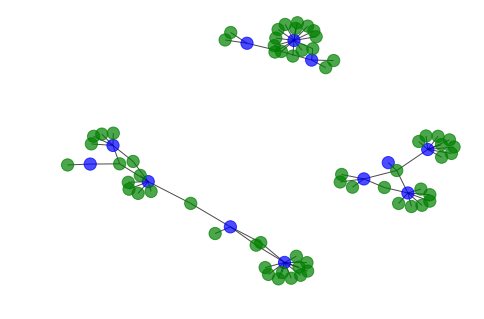

In [21]:
#Your code here
%matplotlib inline
nx.draw(G, with_labels=False, node_color=colours, node_size=150, alpha=.7, font_weight="bold")

## Summary

Nice work! In this lab you created an initial network to visualize a bimodal network of businesses and yelp reviewers!